In [8]:
# Проверяем, что всё установилось
import optuna
import neptune
import sklearn

print(f"Optuna версия: {optuna.__version__}")
print(f"Neptune версия: {neptune.__version__}")
print(f"Scikit-learn версия: {sklearn.__version__}")

Optuna версия: 4.7.0
Neptune версия: 1.14.0
Scikit-learn версия: 1.6.1


In [9]:
import numpy as np
import pandas as pd
#import kagglehub
import seaborn as sns
import matplotlib.pyplot as plt



In [10]:
df = pd.read_csv('A:/1 - DS phyton/учебные датасеты/student.csv')

In [11]:
df = df.drop(['Unnamed: 0', 'Id'], axis = 1)
df['High_School_Type'] = df['High_School_Type'].map({'State': 1}).fillna(0)
df['Sex'] = df['Sex'].map({'Male': 1}).fillna(0)
df['Scholarship'] = df['Scholarship'].map({'50%': 0.5, '75%': 0.75, '100%': 1, '25%': 0.25}).fillna(50)
df['Additional_Work'] = df['Additional_Work'].map({'Yes': 1}).fillna(0)
df['Sports_activity'] = df['Sports_activity'].map({'Yes': 1}).fillna(0)
df['Transportation'] = df['Transportation'].map({'Private': 1}).fillna(0)
df['Reading'] = df['Reading'].map({'Yes': 1}).fillna(0)
df['Notes'] = df['Notes'].map({'Yes': 1}).fillna(0)
df['Listening_in_Class'] = df['Listening_in_Class'].map({'Yes': 1}).fillna(0)
df['Project_work'] = df['Project_work'].map({'Yes': 1}).fillna(0)
df['Grade'] = df['Grade'].map({'Fail': 0, 'DD': 1, 'DC': 2, 'CC': 3, 'CB': 4, 'BB': 5, 'BA': 6, 'AA': 7}).fillna(0)
df['Attendance'] = df['Attendance'].map({'Always': 1, 'Sometimes': 0.5, 'Never': 0}).fillna(0)

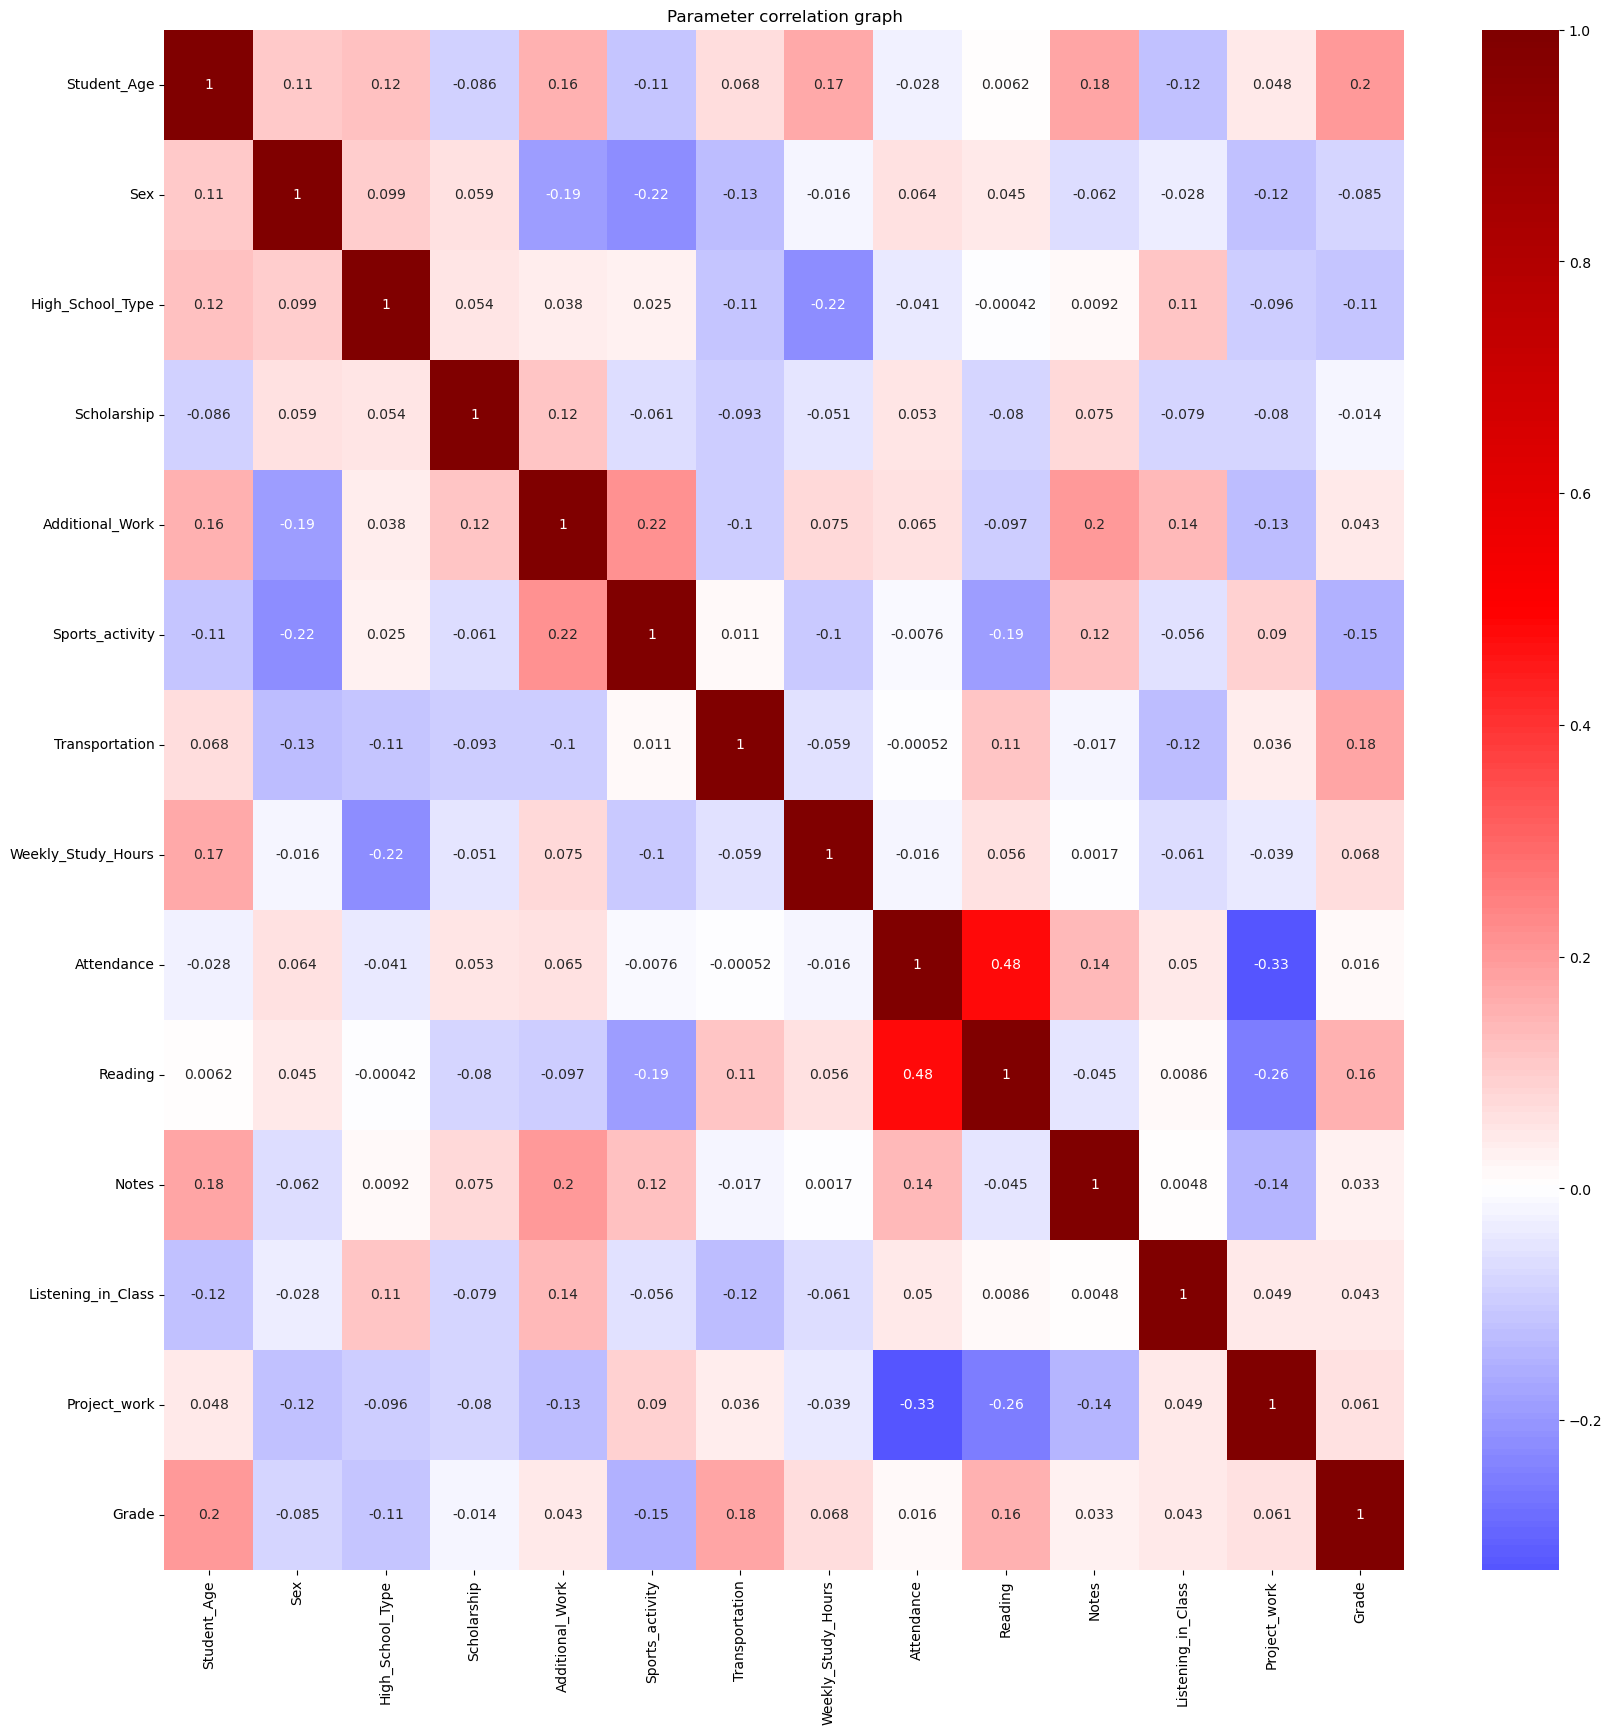

In [12]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True, cmap='seismic', center=0)
plt.title('Parameter correlation graph')
plt.show()

In [13]:
#DecisionTreeRegressor

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [14]:
y = df['Grade']
x = df.drop(columns = ['Grade'])

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.1, random_state=42)

In [15]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


# Базовая модель
base_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=42,
    min_samples_leaf=5,
    class_weight='balanced'
)

base_model.fit(x_train, y_train)
y_pred_base = base_model.predict(x_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred_base):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_base, average='weighted'):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_base, average='weighted'):.2f}")
print(f"F1-score: {f1_score(y_test, y_pred_base, average='weighted'):.2f}")


=== БАЗОВАЯ МОДЕЛЬ ===
Accuracy: 0.13
Precision: 0.12
Recall: 0.13
F1-score: 0.12


C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [16]:
# RandomizedSearchCV 
print("RANDOMIZED SEARCH CV ")
param_dist = {
    'n_estimators': [10, 50, 100, 200, 300],
    'max_depth': [2, 5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 6],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}

random_search = RandomizedSearchCV(
    RandomForestClassifier(random_state=42, class_weight='balanced'),
    param_distributions=param_dist,
    n_iter=100,  
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

random_search.fit(x_train, y_train)
print(f"Лучшие параметры: {random_search.best_params_}")
print(f"Лучший score: {random_search.best_score_:.3f}")

y_pred_random = random_search.best_estimator_.predict(x_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred_random):.2f}")
print(f"F1-score: {f1_score(y_test, y_pred_random, average='weighted'):.2f}")

RANDOMIZED SEARCH CV 
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Лучшие параметры: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 2, 'bootstrap': False}
Лучший score: 0.292
Accuracy: 0.20
F1-score: 0.15


In [17]:
# GridSearchCV 
print("GRID SEARCH CV")
param_grid = {
    'n_estimators': [20, 50, 100, 200],
    'max_depth': [1, 2, 3, 5, 10, 15],
    'min_samples_leaf': [1, 3, 5],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42, class_weight='balanced'),
    param_grid=param_grid,
    cv=5,
    scoring='f1_weighted',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(x_train, y_train)
print(f"Лучшие параметры: {grid_search.best_params_}")
print(f"Лучший score: {grid_search.best_score_:.3f}")

y_pred_grid = grid_search.best_estimator_.predict(x_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred_grid):.2f}")
print(f"F1-score: {f1_score(y_test, y_pred_grid, average='weighted'):.2f}")

GRID SEARCH CV
Fitting 5 folds for each of 144 candidates, totalling 720 fits
Лучшие параметры: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 200}
Лучший score: 0.257
Accuracy: 0.20
F1-score: 0.15


In [18]:
import optuna
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, f1_score

y = df['Grade']
X = df.drop(columns=['Grade'])
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Функция для Optuna
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 200),
        'max_depth': trial.suggest_int('max_depth', 5, 15),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 5),
    }
    
    model = RandomForestClassifier(**params, random_state=42, n_jobs=-1)
    
    score = cross_val_score(model, X_train, y_train, cv=3, scoring='f1_weighted').mean()
    return score

# Оптимизация
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10, show_progress_bar=True)

# Лучшая модель
best_params = study.best_params
print(f"Лучшие параметры: {best_params}")
print(f"Лучший score: {study.best_value:.3f}")

model = RandomForestClassifier(**best_params, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(f"F1-score: {f1_score(y_test, y_pred, average='weighted'):.3f}")

[I 2026-02-09 06:23:45,664] A new study created in memory with name: no-name-4e711270-955e-4f26-873a-3a9621a669d5


  0%|          | 0/10 [00:01<?, ?it/s]

[I 2026-02-09 06:23:55,516] Trial 0 finished with value: 0.1907663131466418 and parameters: {'n_estimators': 125, 'max_depth': 9, 'min_samples_leaf': 3}. Best is trial 0 with value: 0.1907663131466418.
[I 2026-02-09 06:23:57,547] Trial 1 finished with value: 0.1720348414986396 and parameters: {'n_estimators': 161, 'max_depth': 5, 'min_samples_leaf': 5}. Best is trial 0 with value: 0.1907663131466418.
[I 2026-02-09 06:23:58,972] Trial 2 finished with value: 0.18246156258976773 and parameters: {'n_estimators': 163, 'max_depth': 13, 'min_samples_leaf': 4}. Best is trial 0 with value: 0.1907663131466418.
[I 2026-02-09 06:24:00,467] Trial 3 finished with value: 0.18236247139755912 and parameters: {'n_estimators': 169, 'max_depth': 14, 'min_samples_leaf': 4}. Best is trial 0 with value: 0.1907663131466418.
[I 2026-02-09 06:24:01,412] Trial 4 finished with value: 0.1545070658313291 and parameters: {'n_estimators': 101, 'max_depth': 15, 'min_samples_leaf': 5}. Best is trial 0 with value: 0.190

In [ ]:
# украдено у нейросети, надо разбираться

import optuna
import neptune
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Инициализация Neptune
run = neptune.init_run(
    project="dubovcovalexey/project",
    api_token="eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiJjYjZjOGY5MC1lZDJlLTRiNzMtYmUyNC1lYjQ0NzBhMGM1OWUifQ==",
    name="RandomForest_Simple_v2",
    tags=["simple", "visualization", "beginner"]
)

print("✅ Neptune запущен!")

# 2. Подготовка данных
y = df['Grade']
X = df.drop(columns=['Grade'])
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Логируем базовую информацию
run["data/shape"] = f"{X.shape}"
run["data/train_size"] = len(X_train)
run["data/test_size"] = len(X_test)

# 3. Простая модель с фиксированными параметрами
model_params = {
    'n_estimators': 100,
    'max_depth': 10,
    'random_state': 42
}

run["model/parameters"] = model_params

model = RandomForestClassifier(**model_params)
model.fit(X_train, y_train)

# 4. Предсказания и метрики
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

run["metrics/accuracy"] = accuracy
run["metrics/f1_score"] = f1

print(f"\n📊 Результаты модели:")
print(f"Accuracy: {accuracy:.3f}")
print(f"F1-score: {f1:.3f}")

# 5. ВИЗУАЛИЗАЦИЯ 1: Матрица ошибок (самая полезная!)
print("\n📈 Создаем визуализации...")

# Матрица ошибок
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix\n(Как модель ошибается)')
plt.xlabel('Предсказанные значения')
plt.ylabel('Истинные значения')

# Сохраняем и загружаем в Neptune
plt.savefig('confusion_matrix.png', dpi=100, bbox_inches='tight')
run["visualizations/confusion_matrix"].upload('confusion_matrix.png')
plt.close()

print("✓ Матрица ошибок сохранена")

# 6. ВИЗУАЛИЗАЦИЯ 2: Важность признаков
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

# Топ-10 признаков
plt.figure(figsize=(10, 6))
top_features = feature_importance.head(10)
plt.barh(range(len(top_features)), top_features['importance'])
plt.yticks(range(len(top_features)), top_features['feature'])
plt.gca().invert_yaxis()  # Самый важный признак сверху
plt.title('Топ-10 самых важных признаков')
plt.xlabel('Важность')

plt.savefig('feature_importance.png', dpi=100, bbox_inches='tight')
run["visualizations/feature_importance"].upload('feature_importance.png')
plt.close()

print("✓ Важность признаков сохранена")

# 7. Дополнительно: простой график распределения ошибок
errors = y_test != y_pred
error_rate = errors.mean()

plt.figure(figsize=(6, 4))
plt.bar(['Правильно', 'Неправильно'], 
        [len(y_test) - errors.sum(), errors.sum()],
        color=['green', 'red'])
plt.title(f'Распределение предсказаний\n(Ошибок: {error_rate:.1%})')
plt.ylabel('Количество примеров')

plt.savefig('error_distribution.png', dpi=100, bbox_inches='tight')
run["visualizations/error_distribution"].upload('error_distribution.png')
plt.close()

print("✓ Распределение ошибок сохранена")

# 8. ВАЖНО: Получаем ссылку ДО закрытия run!
run_id = run["sys/id"].fetch()
experiment_url = f"https://app.neptune.ai/dubovcovalexey/project/r/{run_id}"

# 9. Только теперь закрываем run
run.stop()

print("\n" + "="*50)
print("🎉 ЭКСПЕРИМЕНТ УСПЕШНО ЗАВЕРШЕН!")
print("="*50)
print(f"🔗 Ссылка на эксперимент: {experiment_url}")
print("\n📋 Что вы увидите в Neptune:")
print("1. model/parameters - Параметры модели")
print("2. metrics/ - Accuracy и F1-score")
print("3. visualizations/ - 3 графика:")
print("   • Матрица ошибок - какие оценки путает модель")
print("   • Важность признаков - что влияет на прогноз")
print("   • Распределение ошибок - сколько ошибок")
print("="*50)

# 10. Выводим важность признаков в консоль для быстрого просмотра
print("\n🔍 Топ-5 самых важных признаков:")
for i, (_, row) in enumerate(feature_importance.head(5).iterrows(), 1):
    print(f"{i}. {row['feature']}: {row['importance']:.4f}")